# Part I
# **Ford GoBike / bike-sharing system - San Francisco Bay area**
>### - in the period February 2019 -

>## by Michael Hasterok



## Preliminary Wrangling

In [2]:
# import packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load dataset
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df_bike.shape)
print(df_bike.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
sum(df_bike.duplicated()) 

0

In [5]:
df_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df_bike.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
137969,471,2019-02-08 08:11:59.8480,2019-02-08 08:19:51.7940,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.80477,-122.403234,3237,Subscriber,1996.0,Female,No


In [7]:
df_bike[['duration_sec', 'member_birth_year']].describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [8]:
df_station_isna = df_bike[df_bike['start_station_id'].isna()]
print(df_station_isna['start_station_longitude'].unique())
print(df_station_isna['start_station_latitude'].unique())

[-121.94 -121.95 -121.93 -121.92 -121.96 -121.98]
[37.4  37.41 37.39 37.42 37.38]


In [9]:
# Quantity Start Stations
start_stations = df_bike['start_station_id'].unique()
np.count_nonzero(start_stations)

330

In [10]:
df_bike[df_bike['start_station_longitude'].isin([-121.94, -121.95, -121.93, -121.92, -121.96, -121.98])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


## Cleaning data

In [11]:
# make a copy - df_bc == Data Frame Bike Clean
df_bc = df_bike.copy()

In [12]:
df_bc.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [13]:
df_bc['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [14]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Issues
1. 197 rows without Start- and Endstation / 6 unknown Start- / Endstations
- drop this rows

2. wrong dtype --> should be
- start_time --> datetime
- end_time --> datetime
- start_station_id --> int
- end_station_id --> int
- member_birth_year --> int 

3. missing values --> action
- member_birth_year --> set to 0
- member_gender --> set to 'not specified'

4. min birthyear = 1878 / 72 members older than 100
- set to 0

In [15]:
# cleaning the issues named above
df_bc = df_bc.dropna(subset=['start_station_id']).reset_index()

df_bc['start_time'] = pd.to_datetime(df_bc['start_time'])
df_bc['end_time'] = pd.to_datetime(df_bc['end_time'])
df_bc['start_station_id'] = df_bc['start_station_id'].astype('int')
df_bc['end_station_id'] = df_bc['end_station_id'].astype('int')

df_bc['member_gender'] = df_bc['member_gender'].fillna('not specified')
df_bc['member_birth_year'] = df_bc['member_birth_year'].fillna(0)

df_bc['member_birth_year'] = df_bc['member_birth_year'].astype('int')


In [16]:
# member birth years older than 100
indexlist_toold = df_bc[df_bc['member_birth_year'].between(1, 1919)].index
indexlist_toold

Int64Index([  1284,  10819,  16071,  19353,  21400,  21482,  24015,  26103,
             27339,  27643,  29682,  32245,  32685,  32769,  32902,  34706,
             38879,  41135,  41187,  41260,  43820,  45784,  48736,  58145,
             60879,  61529,  62515,  66608,  72614,  72722,  73652,  75580,
             78789,  88023,  92481,  93063,  94196,  94486,  97591,  97867,
            101112, 102018, 107228, 107488, 108182, 108878, 110334, 110600,
            114625, 115499, 118869, 122045, 123088, 128821, 137625, 138118,
            140569, 145327, 147336, 149925, 151753, 161316, 161861, 162922,
            166988, 170896, 171567, 171806, 173520, 177515, 177692, 182633],
           dtype='int64')

In [17]:
# set false (to old) birth years to 0
df_bc.loc[indexlist_toold, 'member_birth_year']=0
df_bc[df_bc['member_birth_year'].between(1, 1919)].index

Int64Index([], dtype='int64')

In [18]:
# save cleaned datafile to csv file
df_bc.to_csv('201902-fordgobike-tripdata_clean1.csv', sep=',', index=False)

In [19]:
# check the cleaned data
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    183215 non-null  int64         
 1   duration_sec             183215 non-null  int64         
 2   start_time               183215 non-null  datetime64[ns]
 3   end_time                 183215 non-null  datetime64[ns]
 4   start_station_id         183215 non-null  int32         
 5   start_station_name       183215 non-null  object        
 6   start_station_latitude   183215 non-null  float64       
 7   start_station_longitude  183215 non-null  float64       
 8   end_station_id           183215 non-null  int32         
 9   end_station_name         183215 non-null  object        
 10  end_station_latitude     183215 non-null  float64       
 11  end_station_longitude    183215 non-null  float64       
 12  bike_id         

In [20]:
df_bc.head()

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,not specified,No
2,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes


In [21]:
df_bc.columns

Index(['index', 'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### The structure of the dataset.

> There are 183,215 entries in the dataset. Each entry contains an index and the following 16 entries:  
duration_sec, start_time, end_time, start_station_id,  
start_station_name, start_station_latitude, start_station_longitude, end_station_id,  
end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type,  
member_birth_year, member_gender, bike_share_for_all_trip


> This data types used: 2 x datetime, 4 x float, 6 x int, 5 x object


### Main feature(s) of interest in dataset.

> I'm interested in the absolute numbers of bike-share data such as frequency and duration. I would also like to recognize connections that may result from membership, age, gender or calendar dates.



> I will first look at the distribution of the individual values and then try to identify connections.

## Univariate Exploration




In [22]:
# create a column duration_min
df_bc['duration_min'] = df_bc['duration_sec'] / 60

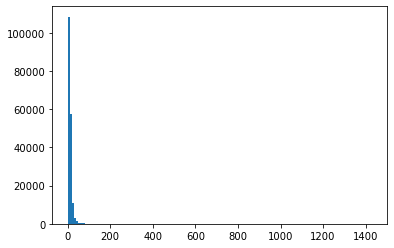

In [23]:
# duration / hist
binsize = 10
bins = np.arange(0, df_bc['duration_min'].max() + binsize, binsize)
plt.hist(data = df_bc, x = 'duration_min', bins = bins);

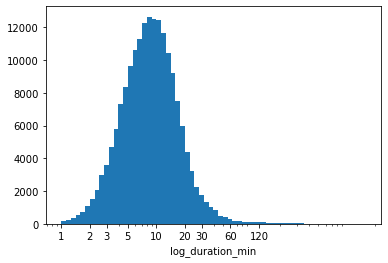

In [24]:
# duration / # there's a very long tail in the distribution, put it on a log scale
binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_bc['duration_min'].max())+binsize, binsize)
plt.hist(data = df_bc, x = 'duration_min', bins = bins)
plt.xscale('log')
x_scale = [1, 2, 3, 5, 10, 20, 30, 60, 120]
plt.xticks(x_scale, x_scale)
plt.xlabel('log_duration_min')
plt.show();

- Duration has a very long-tailed distribution, with a lot of durations on the low last end, and few on the high end. When plotted on a log-scale, the duration looks like normal dirstributed, with a peak of around 10 minuts.

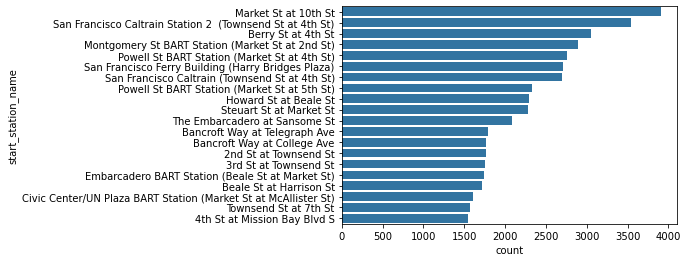

In [25]:
# start station - top 20 / bar
base_color = sb.color_palette()[0]
sb.countplot(data=df_bc, y='start_station_name', color=base_color,
            order=df_bc['start_station_name'].value_counts().iloc[0:20].index);

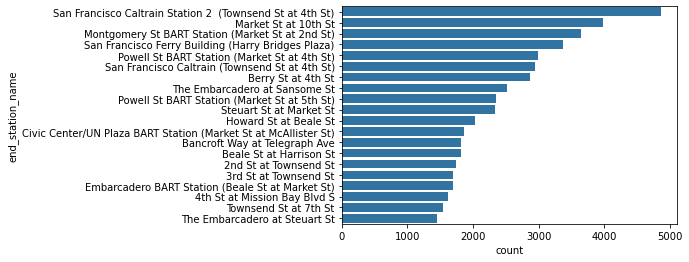

In [26]:
# end station - top 20 / bar
base_color = sb.color_palette()[0]
sb.countplot(data=df_bc, y='end_station_name', color=base_color,
            order=df_bc['end_station_name'].value_counts().iloc[:20].index);

- most common Start Station: Market St at 10th St.
- most common End Station: San Francisco Caltrain Station 2 (Townsend St at 4th St)
- Start Station 'Bancroft Way at College Ave' is only in Top 20 Start Station not in Top 20 End Station

In [27]:
df_bc['user_type'].value_counts().index

Index(['Subscriber', 'Customer'], dtype='object')

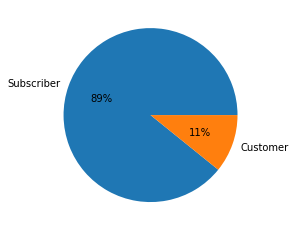

In [28]:
# user type / pie chart

data = list(df_bc['user_type'].value_counts())
labels = df_bc['user_type'].value_counts().index
colors = sb.color_palette()

plt.pie(data, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

- The largest amount of users are subscriber 89 %, the rest are customer 11 %.

In [29]:
# birth year /  age / (5 years bins)
# create the member age column
df_bc['member_age'] = pd.DatetimeIndex(df_bc['start_time']).year - df_bc['member_birth_year']

average age: 34


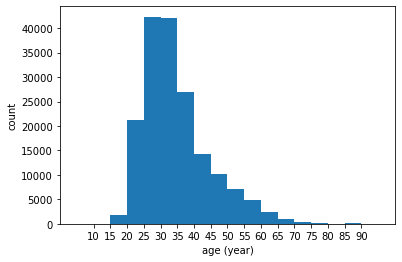

In [30]:
binsize = 5
bins = np.arange(0, df_bc['member_age'].max() + binsize, binsize)
plt.hist(data = df_bc, x = 'member_age', bins = bins)
plt.xlim([0, 100])
plt.xlabel('age (year)')
plt.ylabel('count')
ticks = np.arange(10, 95, 5)
labels = ticks
plt.xticks(ticks, labels);

#df = df[df.line_race != 0]
df_age = df_bc[df_bc['member_age'] <= 100]
df_age['member_age'].describe()
ave_age = df_age['member_age'].mean()
print('average age:', int(ave_age))

- The distribution of customer age is left tailed, the largest customer group is at age between 25 and 35 years.

In [31]:
# save cleaned datafile to csv file
df_age['weekday'] = pd.DatetimeIndex(df_age['start_time']).weekday
df_age['hour'] = pd.DatetimeIndex(df_age['start_time']).hour
df_age.to_csv('201902-fordgobike-tripdata_clean2.csv', sep=',', index=False)

C:\Users\Michael\AppData\Local\Temp/ipykernel_9888/655071040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['weekday'] = pd.DatetimeIndex(df_age['start_time']).weekday
C:\Users\Michael\AppData\Local\Temp/ipykernel_9888/655071040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['hour'] = pd.DatetimeIndex(df_age['start_time']).hour


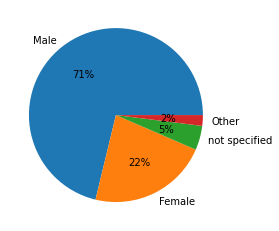

In [32]:
# gender / pie

data = list(df_bc['member_gender'].value_counts())
labels = df_bc['member_gender'].value_counts().index
colors = sb.color_palette()[0:5]

plt.pie(data, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

- Almost 3/4 % of customers are male, round about 1/5 % are female, 2 % ohter and 5 % are not specified.

In [33]:
df_bc['start_time'].describe()

C:\Users\Michael\AppData\Local\Temp/ipykernel_9888/3330208154.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_bc['start_time'].describe()


count                         183215
unique                        183204
top       2019-02-25 08:52:07.582000
freq                               2
first     2019-02-01 00:00:20.636000
last      2019-02-28 23:59:18.548000
Name: start_time, dtype: object

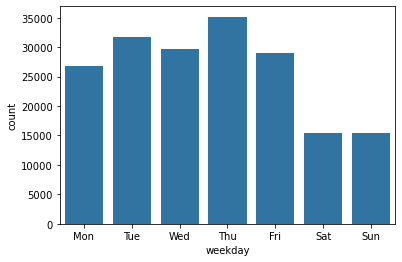

In [33]:
# weekday (monday = 0)
# create the weekday column
df_bc['weekday'] = pd.DatetimeIndex(df_bc['start_time']).weekday

default_color = sb.color_palette()[0]
sb.countplot(data = df_bc, x = 'weekday', color=default_color)
bins = np.arange(0, 7, 1)
xlabel = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(bins, xlabel);

- at the weekend the number of users is much lower

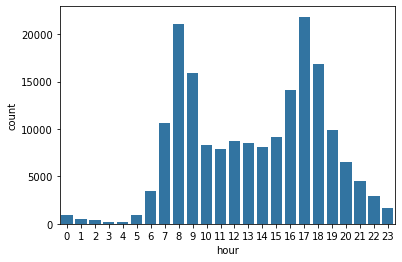

In [34]:
# hour
# create the day hour column
df_bc['hour'] = pd.DatetimeIndex(df_bc['start_time']).hour

default_color = sb.color_palette()[0]
sb.countplot(data = df_bc, x = 'hour', color=default_color);

- The distribution of day hour is bimodal with two peaks at 8 and 17 o'clock.

### Summary - Univariate Exploration

> In order to get a better idea of the times, I converted the time unit from seconds to minutes.
Duration has a very long-tailed distribution, with a lot of durations on the low last end, and few on the high end. When plotted on a log-scale, the duration looks like normal dirstributed, with a peak of around 10 minuts.


> Top 20 Start- / End-Stations
Almost all Top 20 starting Stations are too in Top 20 End Stations. Only exception is here the Start Station 'Bancroft Way at College Ave' not in Top 20 End Station
most common Start Station: Market St at 10th St.
most common End Station: San Francisco Caltrain Station 2 (Townsend St at 4th St)


> The largest amount of users are subscriber 89 %, the rest are customer 11 %.


> To calculate the age, I subtracted the year of birth from the year of data collection.
The distribution of customer age is left tailed, the largest customer group is at age between 25 and 35 years. The average age is 34 years.

> Almost 3/4 % of customers are male, round about 1/5 % are female, 2 % ohter and 5 % are not specified.

> At the weekend the number of users is much lower.

> The distribution of day hour is bimodal with two peaks at 8 and 17 a clock.

## Bivariate Exploration

> Investigating relationships between pairs of variables in the data.

In [35]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    183215 non-null  int64         
 1   duration_sec             183215 non-null  int64         
 2   start_time               183215 non-null  datetime64[ns]
 3   end_time                 183215 non-null  datetime64[ns]
 4   start_station_id         183215 non-null  int32         
 5   start_station_name       183215 non-null  object        
 6   start_station_latitude   183215 non-null  float64       
 7   start_station_longitude  183215 non-null  float64       
 8   end_station_id           183215 non-null  int32         
 9   end_station_name         183215 non-null  object        
 10  end_station_latitude     183215 non-null  float64       
 11  end_station_longitude    183215 non-null  float64       
 12  bike_id         

#### Start by examining whether there are correlations between data.

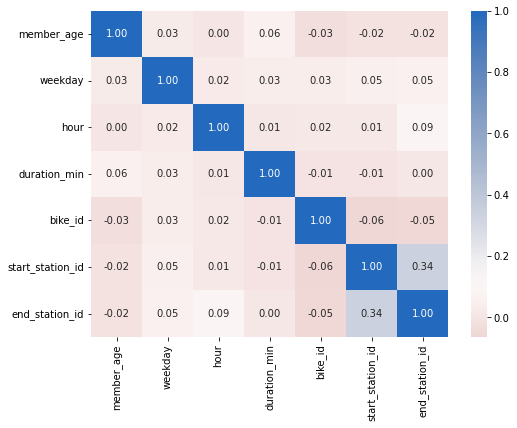

In [36]:
# corr between numeric data of interest

num_data = ['member_age', 'weekday', 'hour', 'duration_min', 'bike_id', 'start_station_id', 'end_station_id']

plt.figure(figsize=[8,6])
sb.heatmap(df_bc[num_data].corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0.1)
plt.show()

- Ther is a linear correlation of 0.34 between start station and end station.
- The realationships betwee (member_age, weekday, hour, duration_min, bike_id, start_station_id, end_station_id) are close to zero.

#### Another look at the relationship duration and age.

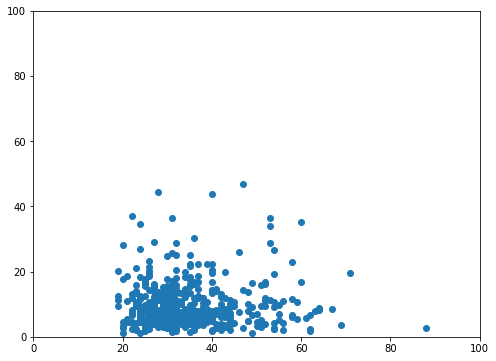

In [37]:
# use a sample of data to provide from overplot

df_bc_sample = df_bc.sample(500, replace=False)

plt.figure(figsize=[8,6])
plt.scatter(data=df_bc_sample, x='member_age', y='duration_min')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

- A concentration of data is visible in the range of ages between 25 and 35 years and duration of 10 minutes.  This is consistant with our previous knowledge at average age of 34 years and most durations of 10 min.  This evaluation confirms that are no releationship between age and duration.

#### duration vs. categorical (weekday, hour, gender, user type)

<Figure size 1080x1080 with 0 Axes>

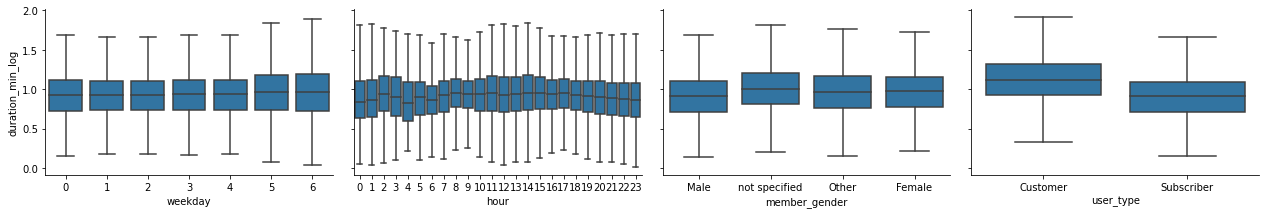

In [38]:
# plot numeric 'duration' against categorical 'weekday', 'hour', 'gender'

# create a log10 duration_min column
df_bc['duration_min_log'] = np.log10(df_bc['duration_min'])

categoric_vars = ['weekday', 'hour', 'member_gender', 'user_type']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color, showfliers=False)  # showfliers False removes extreme values

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = df_bc, y_vars = ['duration_min_log'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- At weekend day the trip durations are a little longer than at Monday till Friday.
- At the times of day with the most frequent use (8 a.m. and 5 p.m.), the travel times are least spread.
- Customer drive longer than subscriber.

#### age vs. categorical (weekday, hour, gender, user type)

C:\Users\Michael\AppData\Local\Temp/ipykernel_23652/3977464602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['weekday'] = pd.DatetimeIndex(df_age['start_time']).weekday
C:\Users\Michael\AppData\Local\Temp/ipykernel_23652/3977464602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['hour'] = pd.DatetimeIndex(df_age['start_time']).hour


<Figure size 1080x1080 with 0 Axes>

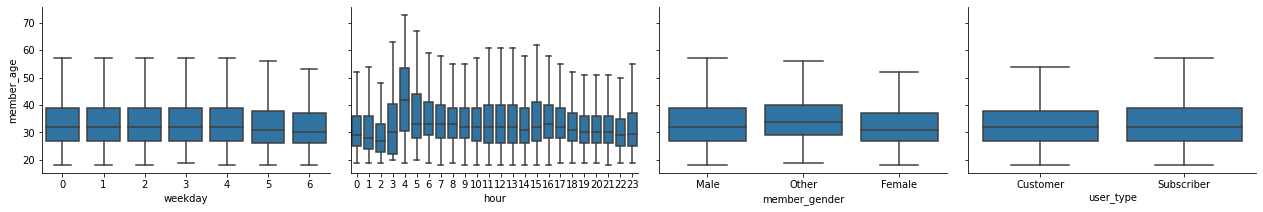

In [39]:
# plot numeric 'duration' against categorical 'weekday'

# create the weekday and hour column
df_age['weekday'] = pd.DatetimeIndex(df_age['start_time']).weekday
df_age['hour'] = pd.DatetimeIndex(df_age['start_time']).hour

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color, showfliers=False)  # showfliers False removes extreme values

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = df_age, y_vars = ['member_age'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- At weekend days the member age is a little younger.
- When comparing age to hour, one value in particular stands out, 4 a clock. Here the users are older than average and the spread is greatest.

### Summary - Univariate Exploration

> **correlations between numeric data of interest**
Ther is a linear correlation of 0.34 between start station and end station.
The realationships betwee (member_age, weekday, hour, duration_min, bike_id, start_station_id, end_station_id) are close to zero.

> **duration vs. age**
A concentration of data is visible in the range of ages between 25 and 35 years and duration of 10 minutes. This is consistant with our previous knowledge at average age of 34 years and most durations of 10 min. This evaluation confirms that are no releationship between age and duration.

> **duration vs. categorical (weekday, hour, gender, user type)**
>- At weekend day the trip durations are a little longer than at Monday till Friday.
>- At the times of day with the most frequent use (8 a.m. and 5 p.m.), the travel times are least spread.
>- Customer drive longer than subscriber.

> **age vs. categorical (weekday, hour, gender, user type)**
>- At weekend days the member age is a little younger.
>- When comparing age to hour, one value in particular stands out, 4 a clock. Here the users are older than average and the spread is greatest.
>- Male user are slightly older on average than Female user.
>- There are few more older subscribers than there are customers.


## Multivariate Exploration

> Creating plots of three or more variables.

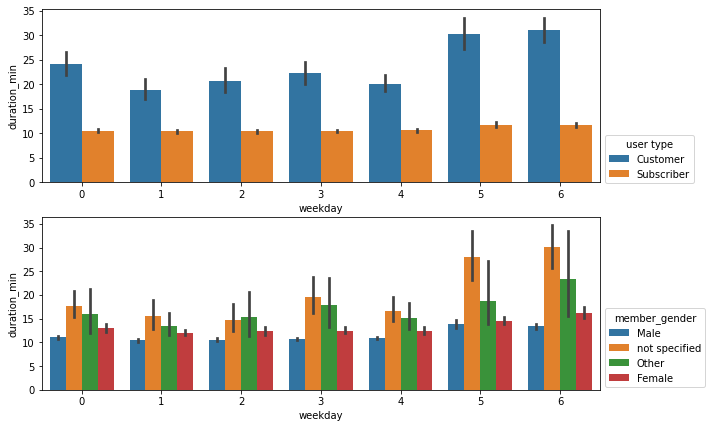

In [40]:
# duration weekday (user_type & gender)

fig, ax = plt.subplots(nrows=2, figsize=[10, 7])

palette = sb.color_palette()

sb.barplot(data=df_bc, x='weekday', y='duration_min', hue='user_type', palette=palette, ax=ax[0])
ax[0].legend(title='user type', loc=2, bbox_to_anchor=(1,0.3))

sb.barplot(data=df_bc, x='weekday', y='duration_min', hue='member_gender', palette=palette, ax=ax[1])
ax[1].legend(title='member_gender', loc=2, bbox_to_anchor=(1,0.5))

- Subscriber are all weekdays approximately same time on the way. Customer travel longer at the weekend.
- All gender travel longer at the weekend. Female travel all days a bit longer than male.

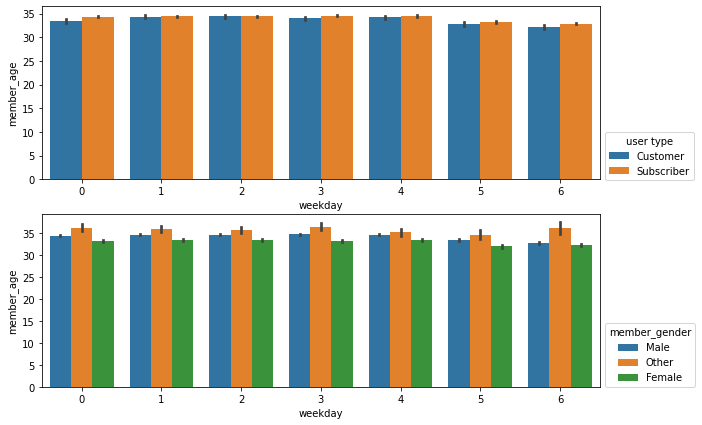

In [41]:
# age weekday (user_type & gender)

fig, ax = plt.subplots(nrows=2, figsize=[10, 7])

palette = sb.color_palette()

sb.barplot(data=df_age, x='weekday', y='member_age', hue='user_type', palette=palette, ax=ax[0])
ax[0].legend(title='user type', loc=2, bbox_to_anchor=(1,0.3))

sb.barplot(data=df_age, x='weekday', y='member_age', hue='member_gender', palette=palette, ax=ax[1])
ax[1].legend(title='member_gender', loc=2, bbox_to_anchor=(1,0.4))

- The average age of users is slightly lower at weekends.
- The average age of female users is slightly lower than that of men on all days.

C:\Users\Michael\AppData\Local\Temp/ipykernel_23652/2215963598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['duration_min_log'] = np.log10(df_age['duration_min'])


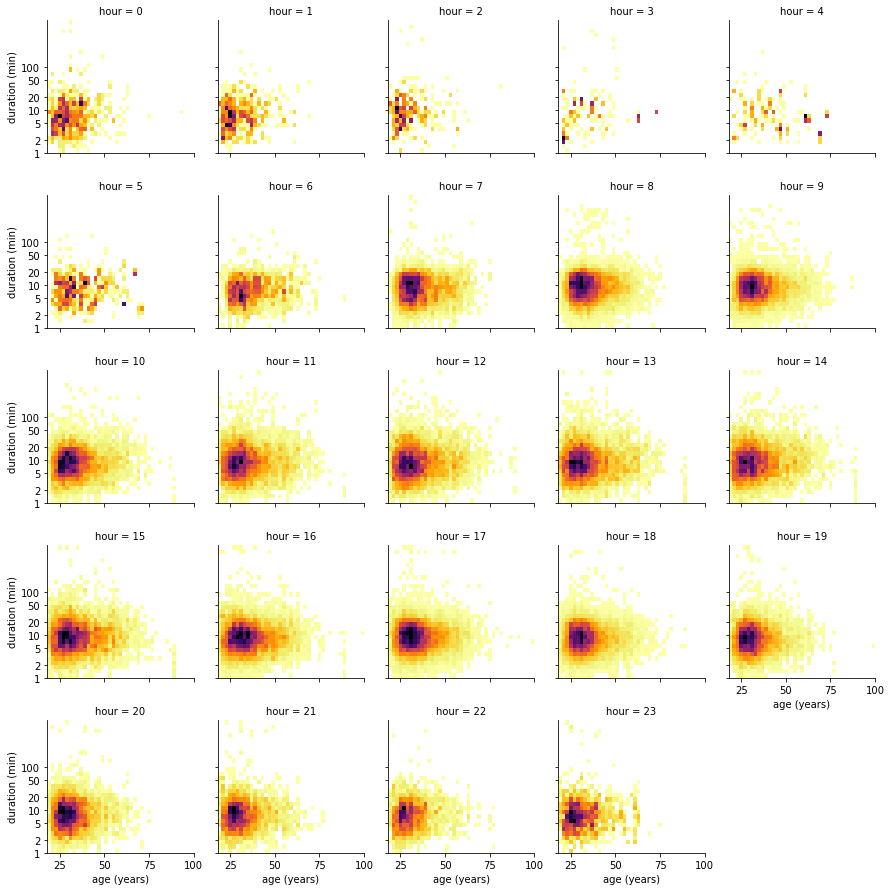

In [42]:
# further investigation if there connections why 4 a glock there are manny older people on the way
# hour 4 / member age

# create a log10 duration_min column
df_age['duration_min_log'] = np.log10(df_age['duration_min'])


def hist2dgrid(x, y, **kwargs):
    palette=kwargs.pop('color')
    bins_x = np.arange(18, df_age['member_age'].max()+2, 2)
    bins_y = np.arange(0, df_age['duration_min_log'].max(), 0.1)
    plt.hist2d(x, y, bins=[bins_x,bins_y], cmap=palette, cmin=0.5)
    plt.yticks(np.log10([1,2,5,10,20,50,100]),[1,2,5,10,20,50,100])


g = sb.FacetGrid(data=df_age, col='hour', col_wrap=5, height=2.5)
g.map(hist2dgrid, 'member_age', 'duration_min_log', color='inferno_r')
g.set_xlabels('age (years)')
g.set_ylabels('duration (min)')
plt.show()


- Between 3 and 5 AM the points are wide distributed. At 4 AM are two little spots by people at age between 60 (10 minutes) and 70 (5 minutes). The remaining times reflect the average values in age and duration.

### Summary - Multivariate Exploration

> **duration at weekday vs. user_type & gender**
>- Subscriber are all weekdays approximately same time on the way. Customer travel longer at the weekend.
>- All gender travel longer at the weekend. Female travel all days a bit longer than male.

> **age at weekday vs. user_type & gender**
>- The average age of users is slightly lower at weekends.
>- The average age of female users is slightly lower than that of men on all days.

> **Facette Grid - hour vs. member age**
>- Between 3 and 5 AM the points are wide distributed. At 4 AM are two little spots by people at age between 60 (10 minutes) and 70 (5 minutes). The remaining times reflect the average values in age and duration.